https://www.kaggle.com/sakshigoyal7/credit-card-customers

---
# CAPSTONE 
--- 

Within this problem we will be mainly focusing on a credit card dataset which surrounds itself with data accoding to its customers. We are given a challenge to utilize a highly imbalanced dataset and predict what features might impact a given target. In this problem our target will be the Attrited Customers and our goal is to predict what might make the credit card customers to churn. Here is our official problem statement: 

**"A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction."**


PURPOSE: To pinpoint and predict what factor has the highest affect on the attrition rate for credit card services!

In [124]:
qualifying_conditions = ['diabetes']

def make_qualifying_previous_condition_column(input):
    if not type(input) == str:
        return 0
    elif input.lower() in qualifying_conditions:
        return 1
    else:
        return 0 
make_qualifying_previous_condition_column('diabetes')

1

In [122]:
# For data wrangling 
import numpy as np
import pandas as pd
from matplotlib import pyplot
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import HalvingGridSearchCV, train_test_split, cross_val_score,StratifiedKFold

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score


from scipy.stats import chi2_contingency

from sklearn.datasets import make_classification, make_regression
from sklearn.svm import SVC

from sklearn.experimental import enable_halving_search_cv
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE



sns.set()

In [3]:
# IMPORTING THE DATA AND CREATING A COPY OF IT: 

bank_raw_data = pd.read_csv('./BankChurners.csv')
cc_df = bank_raw_data.copy()
cc_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


---
### COVARIATE BREAKDOWN
---
- **ATTRITION_FLAG** - If account is closed then Attrited Customer.
- **TOTAL_RELATIONSHIP_COUNT** :Total no. of products held by the customer 
- **CUSTOMER_AGE**: Demographic variable - Customer's  Age in Years text_format.
- **GENDER**: Demographic variable (M = Male, F = Female)
- **EDUCATION_LEVEL**: Demographic variable, Educational Qualifcation of the account holder
- **MARITAL_STATUS**: Demographica variable (Married,Single, Divorced, Unknown)
- **INCOME_CATEGORY** : Demographic variable - Annual Income Vategory of the account holder
- **CARD_CATEGORY** : Product Variable - Type of Card
- **MONTHS_ON_BOOK**: Period of relationship with bank
- **AVG_UTILIZATION_RATIO**: This is the percentage of the total avaialable credit being used. (Lower is better) 
- **DEPENDENT COUNT** : Demographic variable - Number of dependents 
- **CREDIT LIMIT** :Credit Limit on the Credit Card
- **CONTACTS_COUNT_12_MON**: No. of Contacts in the last 12 months
- **MONTHS_INACTIVE_12_MON**: No. of months inactive in the last 12 months

In [4]:
# You might have noticed I did not add the last two Naive_bayes_ Classifier. The manager 
# apparantly tried to train a Naives_Baye Classifier and accidently left it there. Lets go 
# ahead and drop the columns 


## DROPPING LAST TWO COLUMNS 
cc_df = cc_df.iloc[:,:-2]
cc_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
## Lets go ahead and drop CLIENTNUM as is irrelevant to our study: 
cc_df = cc_df.drop('CLIENTNUM', axis = 1)
cc_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
# Lets look at our data and try to make some sense out of it: 

cc_df.describe(include= "all")


# Lets keep an eye on these varaibles: 
      
    # -  Total_trans_Ct,   Total_Ct_Chng_Q4_Q1,  Total_Amt_Chng_Q4_Q1, Avg_Open_To_Buy, Credit_Limit

    # These possible could give us problems later on. 

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [7]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
# LETS DIVE DEEP AND EXPLORE THE DATA: 

def dataoverview(df, message):
    print(f'{message}:\n')
    print("ROWS:", df.shape[0])
    print("\nNUMBER OF VARIABLES:", df.shape[1])
    print("\nVARIABLES:\n")
    print(df.columns.tolist())
    print("\nUNIQUE VALUES:\n")
    print(df.nunique())
    missing_values = df.isnull().sum().sum()
    if  missing_values == 0:
        print("\nMISSING VALUES: No Missing Values")
    else: 
        print("\nMISSING VALUES: ")
        counter = 0 
        for i in m:
            if  i > 0:
                print(m.index[counter].capitalize(),': ', i)
            counter += 1

dataoverview(cc_df, "Data Exploration")

Data Exploration:

ROWS: 10127

NUMBER OF VARIABLES: 20

VARIABLES:

['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

UNIQUE VALUES:

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_

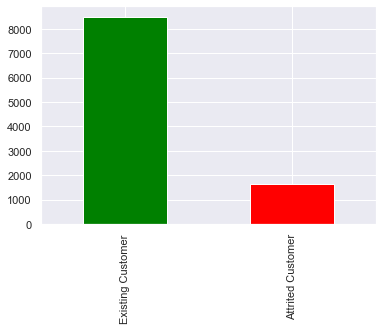

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [9]:
# LETS LOOK AT OUR FEATURE VARIABLE 

# Plotting the pie chart to determine ratio  of Attrition_Flag
# Data to plot 

cc_df['Attrition_Flag'].value_counts().plot(kind='bar', color = ['green','red'])
plt.show()

print(cc_df.Attrition_Flag.value_counts())
# We can obviously see that out dataset is inbalanced. But since we are trying to identify 
# Attrited Customers it is still somewhat useable. 

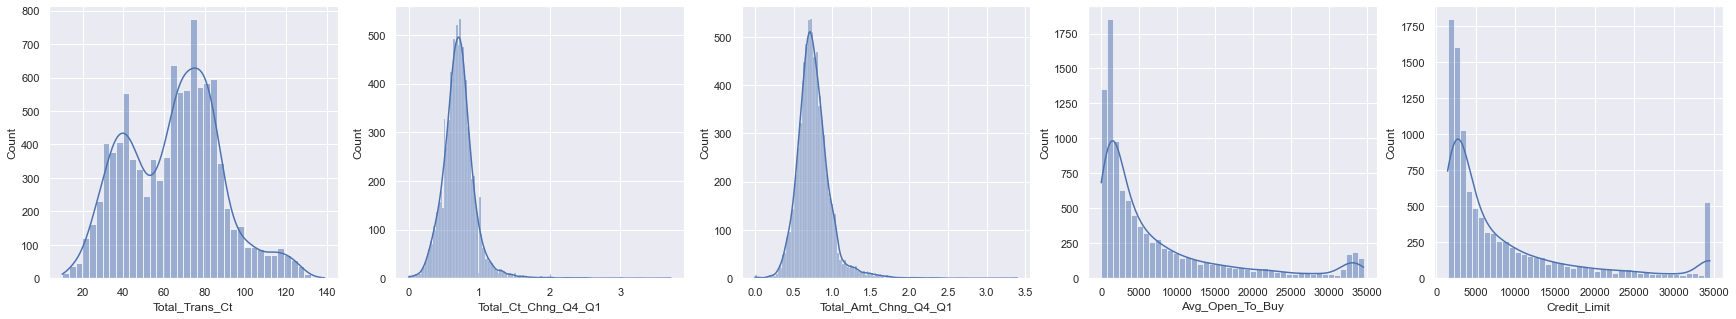

In [10]:
# Lets go back to the variables we are keeping an eye on and look at their distribution: 

def PDF(df, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(30, 5))
    i = 0
    for col in columns: 
        sns.histplot(df[col],ax=axs[i],kde=True);
        i += 1
    plt.show()
    
PDF(cc_df,['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Credit_Limit'])

As you can see Total_Trans_Ct seem to be fairly distributed so we do not need to touch any of it. 

Total_Ct_Chng_Q4_Q1 might need to be adjusted and have the last percent of data removed just so we do not have any huge outliers or tail ends. 

Total_Amt_Chng_Q4_Q1 might need to be adjusted and have the last percent of data removed just so we do not have any huge outliers or tail ends. 

The last two (Avg_Open_To_buy and Credit_Limit) we could ignore for now. 


**I do not want to remove any outliers if they are attrited customers. I can tolerate existed though.**

In [11]:
## Lets look at the outliers for Ct_chng and Amt_Chng: 

print('Total_Ct_Chng_Q4_Q1 OUTLIERS:')
cc_df.sort_values(by = ['Total_Ct_Chng_Q4_Q1'],ascending = False).head()

# I can confirm to continute removing the outliers since its Existing Customers.

Total_Ct_Chng_Q4_Q1 OUTLIERS:


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
773,Existing Customer,61,M,0,Post-Graduate,Married,Unknown,Blue,53,6,2,3,14434.0,1927,12507.0,2.675,1731,32,3.571,0.134
269,Existing Customer,54,M,5,Graduate,Married,$60K - $80K,Blue,38,3,3,3,2290.0,1434,856.0,0.923,1119,18,3.500,0.626
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000
113,Existing Customer,54,F,0,Uneducated,Married,Less than $40K,Blue,36,2,2,2,1494.0,706,788.0,1.674,1305,24,3.000,0.473


In [12]:
# print('Total_Amt_Chng_Q4_Q1 OUTLIERS:')
cc_df.sort_values(by = ['Total_Amt_Chng_Q4_Q1'], ascending = False).head()

# I can confirm to continue removing the outliers since its Existing Customers.

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
773,Existing Customer,61,M,0,Post-Graduate,Married,Unknown,Blue,53,6,2,3,14434.0,1927,12507.0,2.675,1731,32,3.571,0.134
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
219,Existing Customer,44,F,3,Uneducated,Divorced,Less than $40K,Silver,38,4,1,3,11127.0,1835,9292.0,2.368,1546,25,1.273,0.165


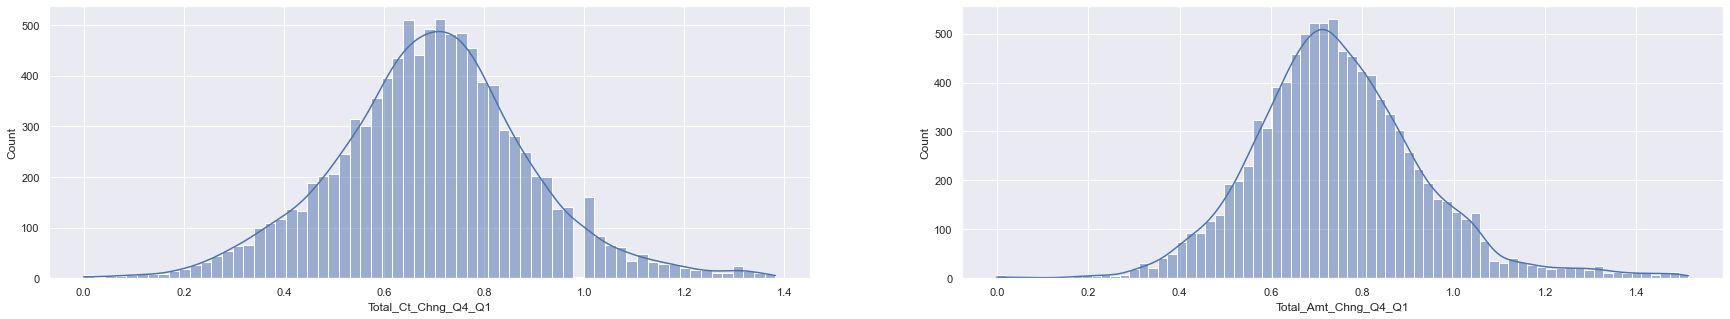


ORIGINAL Data:

 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

UPDATED Data:

 Existing Customer    8302
Attrited Customer    1622
Name: Attrition_Flag, dtype: int64


In [13]:
# DEALING WITH THE OUTLIER DATA 

def removing_outliers(df, columns):
    import pickle
    for i in columns:
        q = df[i].quantile(0.99)
        df = df[df[i]<q]

    return df
    #Save  data set
cc_df_rm = removing_outliers(cc_df,['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'])
PDF(cc_df_rm,['Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1'])

# We can see here that we have a much more evenly distributed graph. Infact its almost perfectly normal. 
# Though there is a missing value, we should change the bins later on. 

# Lets also print out how many values we ended up taking.

print('\nORIGINAL Data:\n\n', cc_df.Attrition_Flag.value_counts())
print('\nUPDATED Data:\n\n', cc_df_rm.Attrition_Flag.value_counts())

# Removing the outliers only took 5 Attrited, but 200 Existing. 

In [14]:
cc_df_rm.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000
mean,46.308948,2.346433,35.924325,3.806630,2.343108,2.457074,8637.044277,1156.827489,7480.216788,0.747249,4454.398932,65.454152,0.696628,0.273723
std,7.993452,1.299655,7.980793,1.560236,1.012007,1.106753,9108.437501,814.991513,9110.139716,0.188608,3410.727150,23.266605,0.196393,0.275457
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2548.000000,274.750000,1336.750000,0.629000,2203.750000,46.000000,0.579000,0.019000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4544.500000,1272.000000,3470.500000,0.734000,3939.000000,68.000000,0.698000,0.175000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11046.250000,1779.000000,9836.250000,0.853000,4756.250000,81.000000,0.811000,0.501000
max,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.514000,18484.000000,139.000000,1.382000,0.999000


In [15]:
print(cc_df_rm.Credit_Limit.value_counts().sort_values().tail())
print()
print(cc_df_rm.Avg_Open_To_Buy.value_counts().sort_values().tail())


# This is defintley going to cause my model some problems. We will come back to this later. 

23981.0     12
9959.0      18
15987.0     18
1438.3     498
34516.0    503
Name: Credit_Limit, dtype: int64

787.0        7
701.0        7
31999.0     26
34516.0     97
1438.3     320
Name: Avg_Open_To_Buy, dtype: int64


In [16]:
# LETS GO BACK TO OUR Target  AND DUMMIFY IT
cc_df_rm.Attrition_Flag = cc_df_rm.Attrition_Flag.map({'Existing Customer' : 0, 'Attrited Customer' : 1})
cc_df_rm.Attrition_Flag.head()

5     0
10    0
11    0
14    0
19    0
Name: Attrition_Flag, dtype: int64

In [17]:
cc_df_rm.duplicated().sum() # 0 

# Since we do not have any duplicates, I would like to think as my dataset clean as of right now. 

cc_df_clean = cc_df_rm.copy()
cc_df_clean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
10,0,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
11,0,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
14,0,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,0,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080


---
### DEMOGRAPHICS EDA
---


Demographic Variables: Age, Gender, Education, Marital_Status, Income, Card Category, Dependent Count


Lets create three matrix of pi charts: 

  - Attrited
  - Existing
  - Both 

In [18]:
# EXISTING 

cc_existing  = cc_df_clean.loc[cc_df_clean['Attrition_Flag'] == 0]
cc_attrited  = cc_df_clean.loc[cc_df_clean['Attrition_Flag'] == 1]


# plot each pie chart in a separate subplot
values = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level','Marital_Status','Income_Category', 'Card_Category']

def plot(df, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(30, 5))
    i = 0
    for col in columns: 
        if len(col) == 2:
             df[col].plot(kind = 'scatter', x = col[0], y = col[1],ax = axs[i],color="k", alpha= 0.5)
        elif df[col].nunique() > 10: # if the values have more then 10 unique values , make a histogram. Too many categories. 
             df[col].plot(kind = 'hist', bins = 15, ax = axs[i])
             axs[i].set_title(col, fontsize = 14, fontweight ='bold')
             axs[i].set_ylabel('')
        else:    
            df.groupby(df[col]).size().plot(kind='pie',textprops={'fontsize': 10},ax=axs[i],autopct='%1.0f%%')
            axs[i].set_title(col, fontsize = 14, fontweight ='bold')
            axs[i].set_ylabel('')
        i += 1
    plt.tight_layout()    
    plt.show()

EXISTING CUSTOMERS DEMOGRAPHICS:



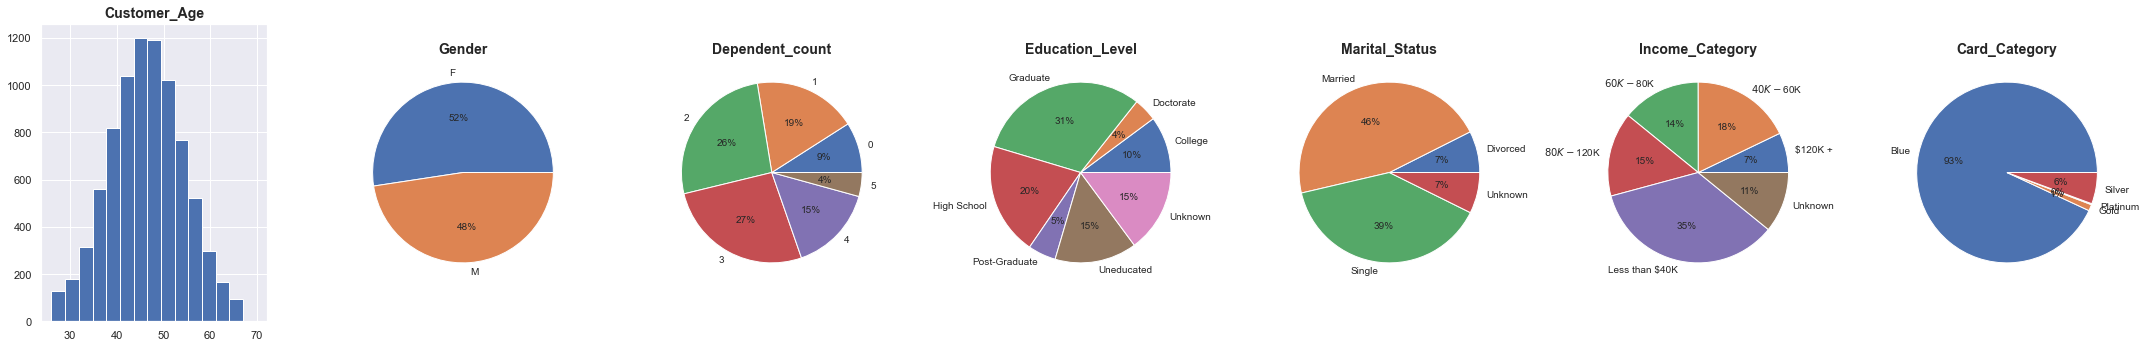


ATTRITED CUSTOMERS DEMOGRAPHICS:



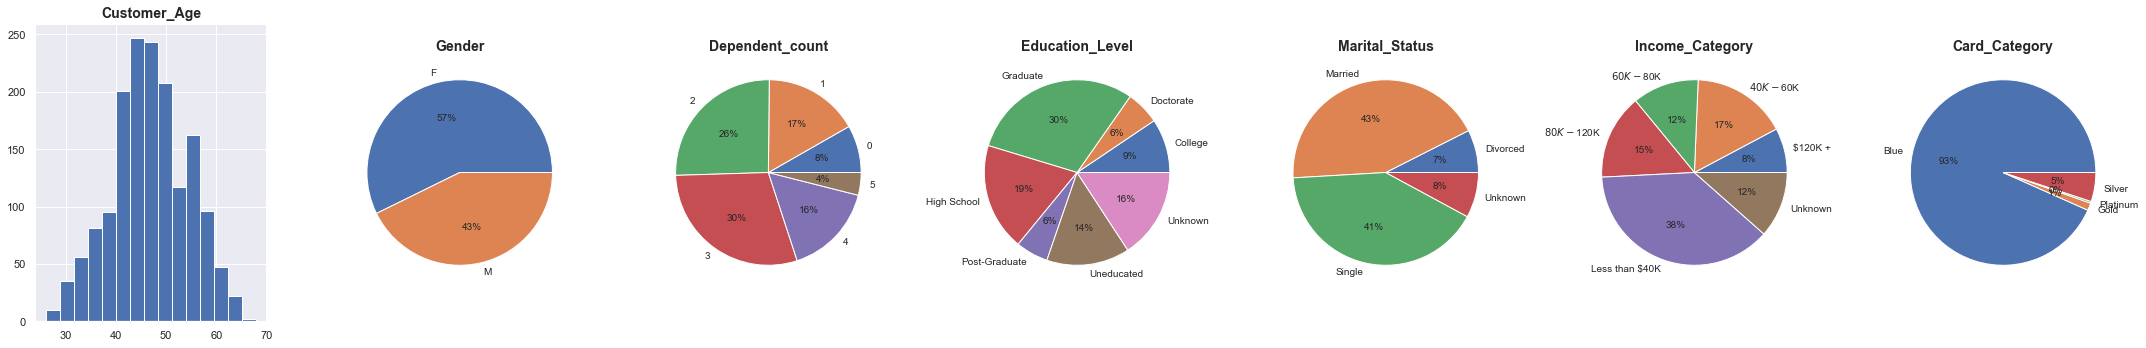


BOTH ATTRITED AND EXISTING CUSTOMERS DEMOGRAPHICS:



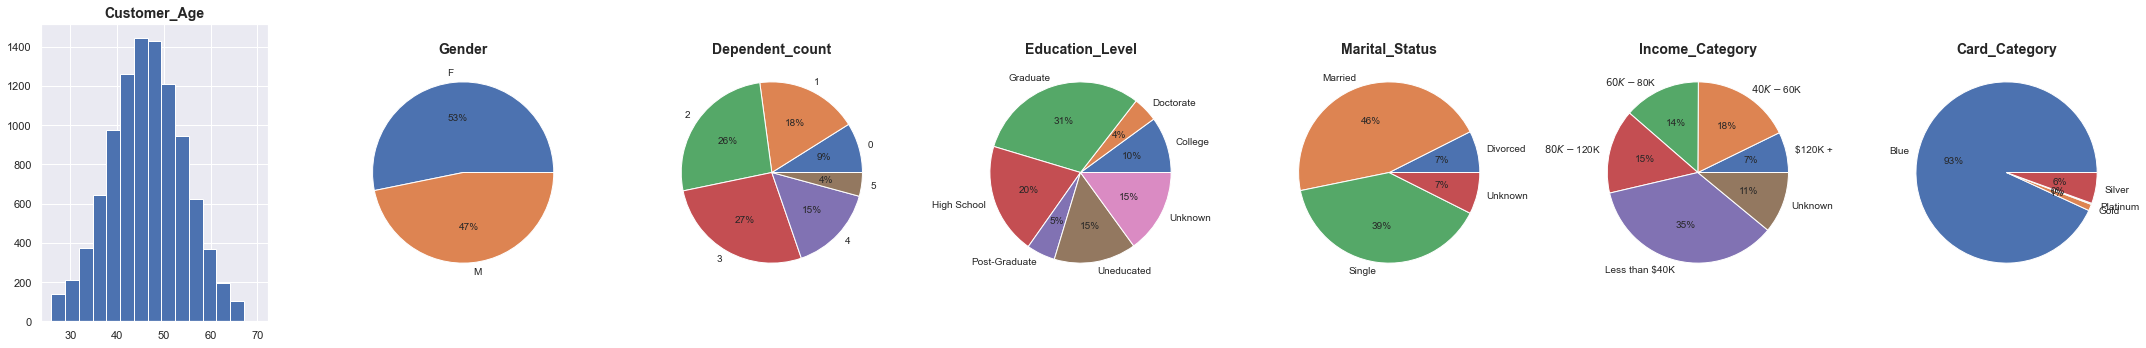

In [19]:
print('EXISTING CUSTOMERS DEMOGRAPHICS:\n')
plot(cc_existing, values)
print()
print('ATTRITED CUSTOMERS DEMOGRAPHICS:\n')
plot(cc_attrited, values)
print()
print('BOTH ATTRITED AND EXISTING CUSTOMERS DEMOGRAPHICS:\n')
plot(cc_df_clean, values)

By looking at these demographic vizualization it is quite interesting how much they are all consistent withen each other. You might think that demographics might look completely different due to the people leaving, probably due to not being educated enough or income is too low. But we can see consistently through both the independent data sets and the whole. 

**Customer_Age**: This data set consistently is almost normally distributed. Yet we might be able to utilize it for our feature values due to a little hiccup. 

**Gender**: Mainly Females in this dataset both are existing and attrited customers.

**Dependent_Count**: It seems like the main household credit card owner for all three provide more than half their annual support to 3 or more dependents. The more dependents the less. 

**Education_Level**: It seems like an average credit card holder is a Graduate or went to High School. I do notice an "UNKNOWN" value which seems to be an alternated NULL value. Due to its minor impact we will not remove it. 

**Marital_Status**: Seems to be consistant throughout all three visuals. Most seem to be married , while others are Single. No suprise.

**Income_Category**: It seems like people tend to hold a card more and tend to leave more have less than 40k. It is interesting but they contradict and overlap each other making it hard to choose as a feature value.

**Card_Category**: Pretty self explantory, most card holders are blue. 



CONCLUSION: 

As much as it is interesting looking at these values, we can conclude that these will make the model much more complicated and will not be included into our Feature Values. Gender might be valuable as well.

In [20]:
corr = []
non_corr = []
result = []
for col in  cc_df_clean.columns[0:8]:
    CrosstabResult=pd.crosstab(index=cc_df_clean['Attrition_Flag'],columns=cc_df_clean[col])
    ChiSqResult = chi2_contingency(CrosstabResult)
    if ChiSqResult[1] <0.05 and cc_df_clean[col].dtype == 'object':
        corr.append(col)
        result.append(ChiSqResult[1])

    else:
        non_corr.append(col)
print()
print('NON CORRELATED VARIABLES:\n\n', non_corr)
print('\n\nCORRELATED VARIABLES :\n\n')
data =np.array([corr,result]).T
df = pd.DataFrame(data,columns =['Variables','Chi_Sq Value'])
df['Chi_Sq Value'] = df['Chi_Sq Value'].astype(float)
df.sort_values(by = 'Chi_Sq Value')


NON CORRELATED VARIABLES:

 ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Marital_Status', 'Card_Category']


CORRELATED VARIABLES :




,Variables,Chi_Sq Value
0,Gender,0.000352
2,Income_Category,0.037429
1,Education_Level,0.043632


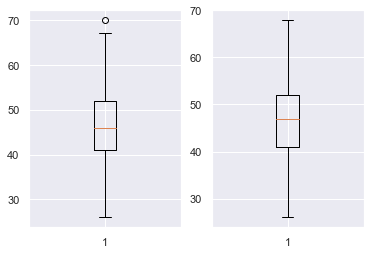

In [21]:
# Example of why I cannot use these as feature values: 

fig1, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(cc_existing.Customer_Age); 
ax2.boxplot(cc_attrited.Customer_Age); 

# They overlap each other too much. 

### CREDIT CARD INFO EDA:
---

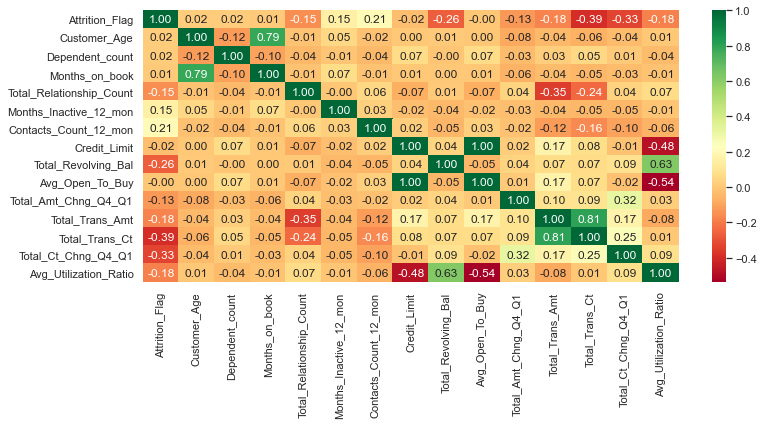

In [22]:
# Since we will not be focusing much on the demographics , let us focus more on the rest of the columns. 
# I want to focus on the heatmap 


plt.subplots(figsize=(12,5))
x = cc_df_clean.corr('pearson')
sns.heatmap(x,annot=True, fmt='.2f', cmap ='RdYlGn');

# There is many weak correlations towards attrition_flag probably due to the poorly distributed target.

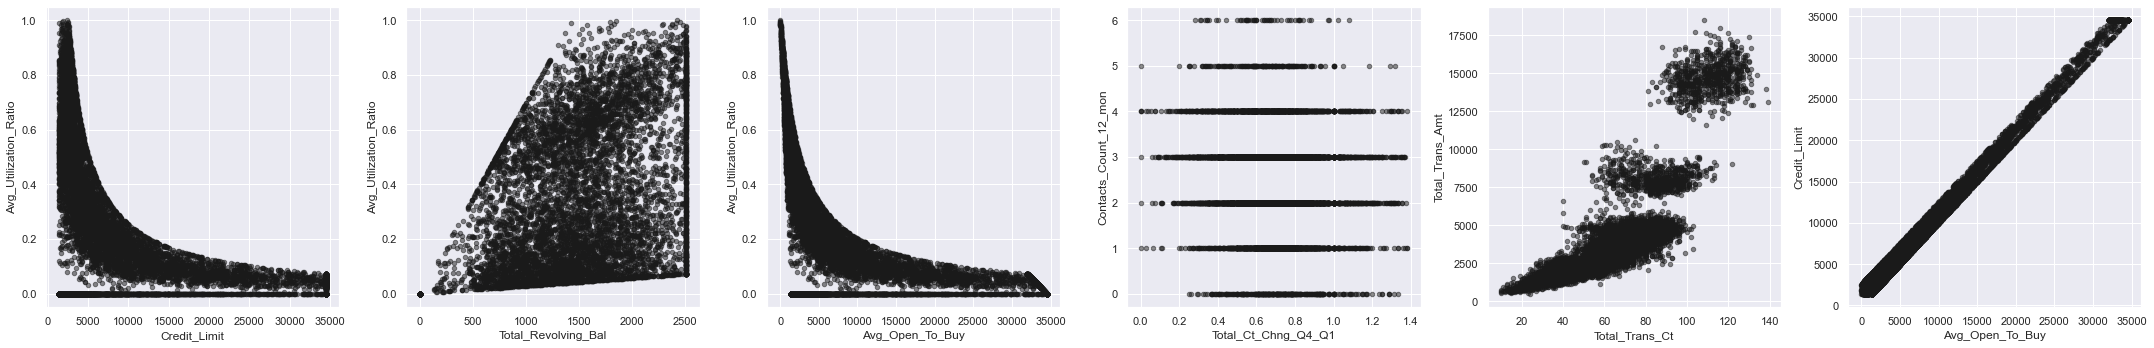

In [23]:
# Lets create Scatter Plots for highly correlated var
values = [['Credit_Limit', 'Avg_Utilization_Ratio'],['Total_Revolving_Bal','Avg_Utilization_Ratio'],['Avg_Open_To_Buy','Avg_Utilization_Ratio'],['Total_Ct_Chng_Q4_Q1','Contacts_Count_12_mon'],['Total_Trans_Ct','Total_Trans_Amt'],['Avg_Open_To_Buy','Credit_Limit']]
plot(cc_df_clean, values);


### PREPROCESSING
---

UPSAMPLING THE DATA USING SMOTE

In [24]:
# Lets remove the unneeded demographics right now: 

cc_df_rm = cc_df_clean.drop(['Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category'], axis = 1)

In [25]:
cc_df_rm.Gender = cc_df_rm.Gender.map({'M' : 0, 'F' : 1})
cc_df_rm.head(1)

,Attrition_Flag,Customer_Age,Gender,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,0,44,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [26]:
oversample = SMOTE()
X, y = oversample.fit_resample(cc_df_rm[cc_df_rm.columns[1:]], cc_df_rm[cc_df_rm.columns[0]])
upsampled_df = X.assign(Churn = y)
print('BEFORE UPSAMPLE:\n\n', cc_df_rm.Attrition_Flag.value_counts())
print()
print('AFTER UPSAMPLE:\n\n',upsampled_df.Churn.value_counts())
print()
print('NEW SHAPE:', upsampled_df.shape)

BEFORE UPSAMPLE:

 0    8302
1    1622
Name: Attrition_Flag, dtype: int64

AFTER UPSAMPLE:

 0    8302
1    8302
Name: Churn, dtype: int64

NEW SHAPE: (16604, 15)


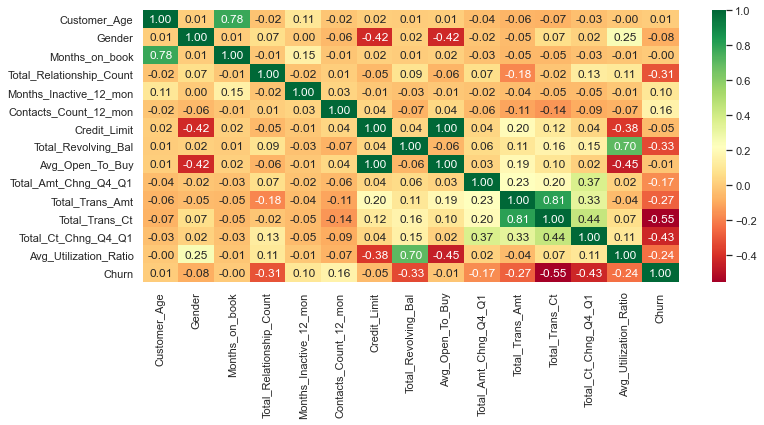

In [27]:
# Lets look at the correlations now : 
plt.subplots(figsize=(12,5))
x = upsampled_df.corr('pearson')
sns.heatmap(x,annot=True, fmt='.2f', cmap ='RdYlGn');

We cam see many changes given churned customers correlations. Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Average Utilization Rate, Total_Trans_Amt, Total_Revolving_Bal and Total_Relationship_Count tend to be pretty negatively impactful towards the data set. 

### FEATURE SELECTION 
---

In [28]:
Targets = upsampled_df["Churn"].values
Features = upsampled_df.drop(labels = ["Churn"], axis = 1)

In [29]:
# Utilizing Decision Tree Models

model = DecisionTreeClassifier()
model.fit(Features,Targets)
importance = model.feature_importances_
X_columns = X.columns
list(zip(X_columns, importance))

[('Customer_Age', 0.023211593243765184),
 ('Gender', 0.0011721996785836822),
 ('Months_on_book', 0.009917765932569959),
 ('Total_Relationship_Count', 0.07091842544337788),
 ('Months_Inactive_12_mon', 0.006726584433083078),
 ('Contacts_Count_12_mon', 0.00808871271282448),
 ('Credit_Limit', 0.007816857913930572),
 ('Total_Revolving_Bal', 0.08353427971875563),
 ('Avg_Open_To_Buy', 0.021454233218642517),
 ('Total_Amt_Chng_Q4_Q1', 0.03529707157517875),
 ('Total_Trans_Amt', 0.19410098646445942),
 ('Total_Trans_Ct', 0.4771602395058502),
 ('Total_Ct_Chng_Q4_Q1', 0.05436598564397116),
 ('Avg_Utilization_Ratio', 0.006235064515007458)]

<AxesSubplot:>

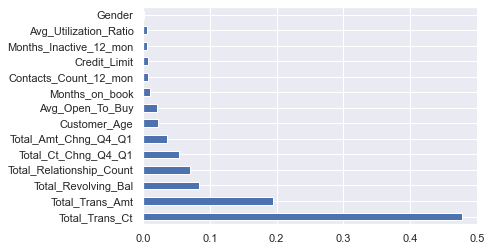

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [31]:
X = upsampled_df.drop('Churn',axis=1)
y = Targets
print(X.columns)

Index(['Customer_Age', 'Gender', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')


## MODELING
---

### LOGISTIC REGRESSION

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:

log_model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

In [117]:
# To get the weights of all the variables
weights = pd.Series(log_model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = True)

Total_Trans_Ct             -3.084741
Total_Relationship_Count   -0.958265
Total_Revolving_Bal        -0.800267
Total_Ct_Chng_Q4_Q1        -0.593810
Customer_Age               -0.140948
Credit_Limit               -0.082176
Total_Amt_Chng_Q4_Q1       -0.054353
Months_on_book             -0.017123
Avg_Open_To_Buy            -0.003549
Gender                      0.016891
Avg_Utilization_Ratio       0.033660
Months_Inactive_12_mon      0.282380
Contacts_Count_12_mon       0.292402
Total_Trans_Amt             1.659352
dtype: float64

### RANDOM FOREST 

In [36]:
random_model = RandomForestClassifier(oob_score=True)
random_model.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

### K-NEAREST NEIGHBOR

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
k_range = range(1, 101)
training_error = []
testing_error = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    training_accuracy = knn.score(X_train, y_train)
    training_error.append(1 - training_accuracy)
    
    testing_accuracy = knn.score(X_test, y_test)
    testing_error.append(1 - testing_accuracy)

In [ ]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False).head()

In [39]:

knn_model = KNeighborsClassifier(n_neighbors=100)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

### CROSS VALIDATION

In [40]:

log_cv = cross_val_score(log_model, X_train, y_train ,
                         cv = StratifiedKFold(n_splits = 5), 
                         scoring  = 'recall')

random_cv =  cross_val_score(random_model, X_train, y_train ,
                         cv = StratifiedKFold(n_splits = 5), 
                         scoring  = 'recall')

knn_cv = cross_val_score(knn_model, X_train, y_train ,
                         cv = StratifiedKFold(n_splits = 5), 
                         scoring  = 'recall')

In [82]:
mean_score = []
std_score = []
rec_score = []

for model in [log_cv, random_cv, knn_cv]:
    mean_score.append(model.mean()) 
    std_score.append(model.std())
    
from sklearn.metrics import recall_score

log_model.fit(X_train, y_train)
random_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

for model in [log_model, random_model, knn_model]:
    rec_score.append(recall_score(y_test,model.predict(X_test)))

In [42]:
Model = ['Logistic Regression', 'Random Forest', 'KNN']
Metrics = pd.DataFrame({'Model': Model,
                        'Mean Score': mean_score,
                       'STD Score': std_score,
                       'Recall Score': rec_score})
Metrics

,Model,Mean Score,STD Score,Recall Score
0,Logistic Regression,0.862565,0.009380,0.866706
1,Random Forest,0.985031,0.004575,0.984005
2,KNN,0.939825,0.007801,0.934242


In [67]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\nhaus\onedrive\anaconda\lib\site-packages (0.24.2)


# EVALUTION 



In [43]:

rfreg = RandomForestRegressor(max_depth = None, oob_score = True,max_features='auto')
rfreg.fit(X_test,y_test)
print('TEST OOB R^2:', (rfreg.oob_score_)) 

print('TRAIN OOB R^2:', (random_model.oob_score_)) 

scores = cross_val_score(rfreg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
print('New RMSE:', np.mean(np.sqrt(-scores)))

# Definitely Overfitted 

TEST OOB R^2: 0.8409731487764898
TRAIN OOB R^2: 0.9771136038545509
New RMSE: 0.19707669269998374


In [ ]:
HYPERTUNING (Overfitting)

In [64]:
param_grid = {'kernel': ('linear', 'rbf'),
               'C': [1, 10, 100]}

In [67]:
from sklearn.pipeline import Pipeline

estimator = Pipeline(steps = [('classifier', random_model)])

params = {"classifier__max_depth": [2,5,7,10],
              "classifier__max_features": [1, 3, 10],
              "classifier__min_samples_split": [2, 5, 10,20,50,100],
              "classifier__min_samples_leaf": [2, 5, 10,20,50,100],
              "classifier__criterion": ["gini", "entropy"]}

sh = HalvingGridSearchCV(estimator, 
                  params, 
                  cv=5, 
                  n_jobs = -1,
                  scoring = 'recall').fit(X_train, y_train)

In [68]:
print('best score', sh.best_score_)
print('best param', sh.best_params_)

best score 0.9695833082944482
best param {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 3, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}


In [86]:
print('Recall Score After:')
sh.best_estimator_.fit(X_train, y_train)
y_predict = sh.best_estimator_.predict(X_test)
print(recall_score(y_test,y_predict))

print()

print('Recall Score Before')
print(Metrics['Recall Score'][1])

Recall Score After:
0.9757109004739336

Recall Score Before
0.9840047393364929


CLASSIFCATION REPORT: 

               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1633
           1       0.95      0.98      0.96      1688

    accuracy                           0.96      3321
   macro avg       0.96      0.96      0.96      3321
weighted avg       0.96      0.96      0.96      3321

CONFUSION TEST MATRIX 




<AxesSubplot:>

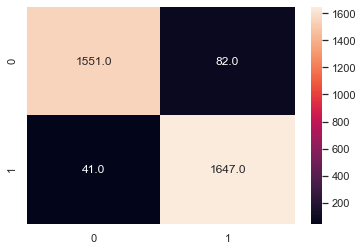

In [106]:
print('CLASSIFCATION REPORT: \n\n', classification_report(y_test,y_predict))
print('CONFUSION TEST MATRIX \n\n')
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['One', 'Zero']
cf = confusion_matrix(y_test,y_predict)

import seaborn as sns
sns.heatmap(cf, annot=True, fmt = '.1f')

In [88]:
print('Accuracy Score:')
accuracy_score(y_test, y_predict)

Accuracy Score:


0.9629629629629629

<AxesSubplot:>

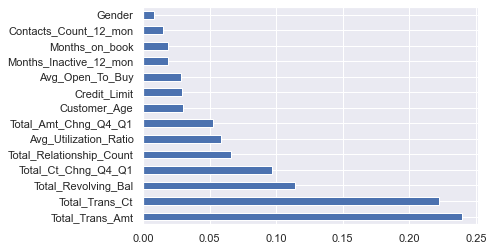

In [114]:
importance = random_model.feature_importances_
X_columns = X.columns
list(zip(X_columns, importance))
feat_importances = pd.Series(random_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')